# IMPORT PACKAGE

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 1. Bagaimana hubungan umur terhadap biaya kesehatan

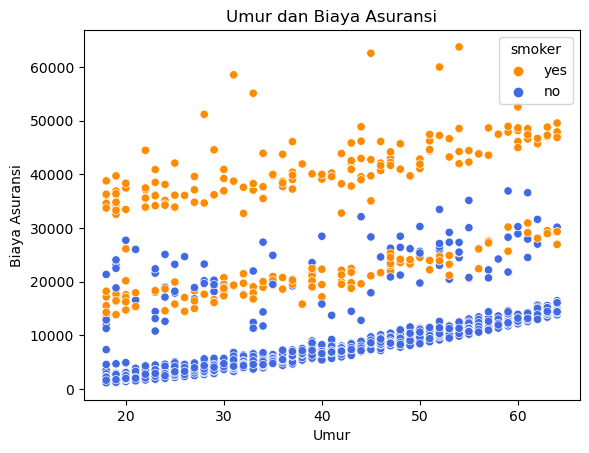

In [8]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.scatterplot(data=insurance, x='age', y='charges',hue='smoker')
ax.set(title='Umur dan Biaya Asuransi',
      xlabel='Umur',
      ylabel='Biaya Asuransi')
plt.show()

In [9]:
insurance["age"].corr(insurance["charges"])

0.29900819333064765

In [10]:
children = insurance.groupby("children")["charges"].mean()
children

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [11]:
median_children = insurance.groupby("children")["charges"].median()
median_children

children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

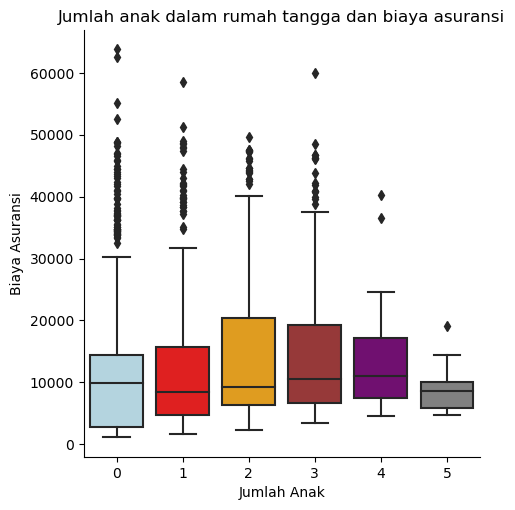

In [12]:
colors = ['lightblue','red','orange','brown','purple','grey']
g = sns.catplot(data=insurance, x='children', y='charges', kind='box', palette=colors)
for ax in g.axes.flat:
    ax.set(title='Jumlah anak dalam rumah tangga dan biaya asuransi',
          xlabel='Jumlah Anak',
          ylabel='Biaya Asuransi')
plt.show()

In [13]:
insurance['children'].corr(insurance['charges'])

0.06799822684790487

## 3. Bagaimana jumlah distribusi people berdasarkan Wilayah

In [14]:
group_people = insurance.groupby("region").count()
group_people

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


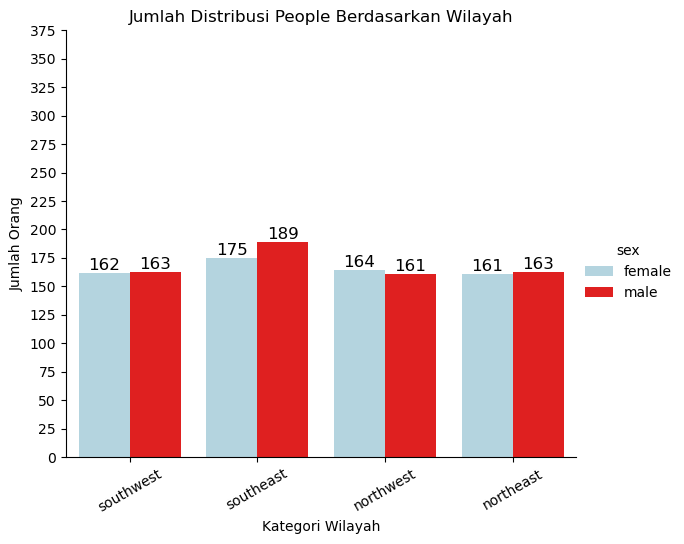

In [15]:
g = sns.catplot(data=insurance, x='region', hue='sex', kind='count', aspect=1.2, palette=colors)
for ax in g.axes.flat:
    ax.set(title='Jumlah Distribusi People Berdasarkan Wilayah', xlabel='Kategori Wilayah', ylabel='Jumlah Orang')
    ax.set_yticks([y for y in range(0, 400, 25)])
    ax.tick_params('x', labelrotation=30)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

From the information, people are distributed fairly even at four regions. Among them the SouthEast region has the most number of people in data.